CGU DATATHON 2024
GOAL: PREDICT PROBABILITY OF DEATH

COOL NOTES:
L1 OPTIMIZATION - LASSO - TO DETERMINE BAD FEATURES
AUTOGLUON - https://auto.gluon.ai/stable/index.html

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [396]:
# extract dataset from csv
test_df = pd.read_csv(r'C:\Users\jpkdu\Documents\GitHub\FinancialEngineering\My Projects\CGU Datathon 2024\test.csv')

train_df = pd.read_csv(r'C:\Users\jpkdu\Documents\GitHub\FinancialEngineering\My Projects\CGU Datathon 2024\train.csv')

In [251]:
train_df.shape

(7284, 32)

In [252]:
test_df.shape

(1821, 32)

In [253]:
train_df.head()

,age,sex,slos,dzgroup,dzclass,edu,income,charges,totcst,totmcst,...,bili,crea,sod,ph,glucose,bun,urine,sfdm2,adlsc,death
0,44.32599,male,15,CHF,COPD/CHF/Cirrhosis,14.0,under $11k,44950.0,23775.2188,24613.29690,...,0.299988,2.599609,129.0,NaN,154.0,51.0,2650.0,SIP>=30,0.00000,1
1,78.39600,male,11,COPD,COPD/CHF/Cirrhosis,14.0,$25-$50k,11293.0,8076.2969,7590.22656,...,0.399963,1.199951,133.0,7.369141,NaN,NaN,NaN,<2 mo. follow-up,3.44873,1
2,32.44098,male,281,ARF/MOSF w/Sepsis,ARF/MOSF,11.0,NaN,1273347.0,633212.0000,NaN,...,1.000000,0.699951,143.0,7.509766,NaN,NaN,NaN,Coma or Intub,7.00000,1
3,74.93994,male,9,ARF/MOSF w/Sepsis,ARF/MOSF,8.0,$11-$25k,48671.0,31515.9844,33310.15620,...,0.799927,1.199951,137.0,7.399414,146.0,25.0,1000.0,no(M2 and SIP pres),0.00000,0
4,61.67599,male,5,Colon Cancer,Cancer,8.0,$11-$25k,2958.0,1935.3555,1559.00000,...,5.199219,5.099609,137.0,7.469727,383.0,101.0,1040.0,<2 mo. follow-up,7.00000,1


In [254]:
test_df.head()

,ID,age,sex,slos,dzgroup,dzclass,edu,income,charges,totcst,...,alb,bili,crea,sod,ph,glucose,bun,urine,sfdm2,adlsc
0,0,75.70197,male,12,COPD,COPD/CHF/Cirrhosis,15.0,$11-$25k,8417.0,5477.2930,...,NaN,0.399963,1.299805,136.0,7.349609,175.0,42.0,1100.0,adl>=4 (>=5 if sur),2.00000
1,1,44.61600,male,16,CHF,COPD/CHF/Cirrhosis,16.0,under $11k,71501.0,34153.9062,...,3.000000,3.199707,1.099854,126.0,NaN,106.0,19.0,2625.0,NaN,5.00000
2,2,66.43396,male,11,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,under $11k,18040.0,11452.9219,...,4.699219,0.699951,1.399902,139.0,7.389648,NaN,NaN,NaN,SIP>=30,3.20752
3,3,50.97897,male,14,CHF,COPD/CHF/Cirrhosis,12.0,$11-$25k,20779.0,12855.9375,...,NaN,NaN,0.599976,133.0,7.449219,160.0,17.0,2065.0,<2 mo. follow-up,2.00000
4,4,49.54999,female,15,Lung Cancer,Cancer,12.0,under $11k,11291.0,8300.6562,...,NaN,0.699951,0.899902,139.0,NaN,88.0,12.0,NaN,no(M2 and SIP pres),0.00000


In [255]:
test_df.info() # has ID but no death column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1821 non-null   int64  
 1   age       1821 non-null   float64
 2   sex       1821 non-null   object 
 3   slos      1821 non-null   int64  
 4   dzgroup   1821 non-null   object 
 5   dzclass   1821 non-null   object 
 6   edu       1502 non-null   float64
 7   income    1258 non-null   object 
 8   charges   1777 non-null   float64
 9   totcst    1642 non-null   float64
 10  totmcst   1124 non-null   float64
 11  race      1812 non-null   object 
 12  hday      1821 non-null   int64  
 13  diabetes  1821 non-null   int64  
 14  dementia  1821 non-null   int64  
 15  ca        1821 non-null   object 
 16  meanbp    1820 non-null   float64
 17  wblc      1783 non-null   float64
 18  hrt       1820 non-null   float64
 19  resp      1820 non-null   float64
 20  temp      1820 non-null   floa

In [206]:
train_df.info() # has no ID but has death column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7284 non-null   float64
 1   sex       7284 non-null   object 
 2   slos      7284 non-null   int64  
 3   dzgroup   7284 non-null   object 
 4   dzclass   7284 non-null   object 
 5   edu       5969 non-null   float64
 6   income    4865 non-null   object 
 7   charges   7156 non-null   float64
 8   totcst    6575 non-null   float64
 9   totmcst   4506 non-null   float64
 10  race      7251 non-null   object 
 11  hday      7284 non-null   int64  
 12  diabetes  7284 non-null   int64  
 13  dementia  7284 non-null   int64  
 14  ca        7284 non-null   object 
 15  meanbp    7284 non-null   float64
 16  wblc      7110 non-null   float64
 17  hrt       7284 non-null   float64
 18  resp      7284 non-null   float64
 19  temp      7284 non-null   float64
 20  pafi      5429 non-null   floa

In [215]:
train_df.columns # see what are the available features

Index(['age', 'sex', 'slos', 'dzgroup', 'dzclass', 'edu', 'income', 'charges',
       'totcst', 'totmcst', 'race', 'hday', 'diabetes', 'dementia', 'ca',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'sfdm2', 'adlsc', 'death'],
      dtype='object')

FEATURES SELECTION / ENGR

In [289]:
# need to understand what each feature is - src: https://archive.ics.uci.edu/dataset/880/support2
# we do features selection BEFORE pre-processing data so that we can only focus on cleaning the dataset of features that we want

# TIP: use pandas methodologies in splitting the dataset into categorical and numerical data, do correlation matrix on numerical and other shizz

In [256]:
# Separate numerical and categorical features
numerical_df = train_df.select_dtypes(include=['number'])
categorical_df = train_df.select_dtypes(include=['object', 'category'])

In [303]:
numerical_df.columns # note: dementia and diabetes are categorical

Index(['age', 'slos', 'edu', 'charges', 'totcst', 'totmcst', 'hday',
       'diabetes', 'dementia', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi',
       'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlsc',
       'death'],
      dtype='object')

In [305]:
categorical_df.columns

Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'sfdm2'], dtype='object')

In [281]:
corr_to_death = numerical_df.corr()['death'].sort_values() # pick out features that has relatively high correlation to death

corr_to_death[ (corr_to_death > 0.02) | (corr_to_death < -0.02) ] # choose |feature_value| > 0.02


slos       -0.085374
temp       -0.029369
meanbp     -0.027096
totcst     -0.025007
totmcst    -0.024478
bun         0.023021
crea        0.027458
bili        0.035942
dementia    0.042522
hday        0.065869
adlsc       0.164740
age         0.172996
death       1.000000
Name: death, dtype: float64

In [403]:
numerical_features = corr_to_death[ (corr_to_death > 0.02) | (corr_to_death < -0.02) ].index.values
numerical_features = numerical_features[ numerical_features != 'dementia' ] # removes dementia since it's not a numerical feature

numerical_features

array(['slos', 'temp', 'meanbp', 'totcst', 'totmcst', 'bun', 'crea',
       'bili', 'hday', 'adlsc', 'age', 'death'], dtype=object)

In [404]:
# note: dementia and diabetes are categorical
categorical_df['diabetes'] = numerical_df['diabetes']
categorical_df['dementia'] = numerical_df['dementia']

In [405]:
categorical_df.columns

Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'sfdm2',
       'diabetes', 'dementia'],
      dtype='object')

In [406]:
'''
 If the p-value is less than a chosen significance level (commonly 0.05), 
 you reject the null hypothesis of independence and conclude that there is a significant association between the two variables.

'''

from scipy.stats import chi2_contingency


p_values = []

for categorical_feature in categorical_df.columns.values:

    # Create a contingency table
    contingency_table = pd.crosstab(categorical_df[categorical_feature], train_df['death']) # iterate through the categorical features while comparing to death feature

    # Perform chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    p_values.append(p)

p_values_df = pd.DataFrame(index=categorical_df.columns.values, data=p_values, columns=['p-values'])

p_values_df[ p_values_df['p-values'] < 0.05] 



,p-values
sex,1.382088e-03
dzgroup,4.269074e-119
dzclass,1.042746e-74
race,5.807045e-03
ca,2.533140e-101
sfdm2,0.000000e+00
dementia,3.747434e-04


In [407]:
categorical_features = p_values_df[ p_values_df['p-values'] < 0.05].index.values
categorical_features


array(['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'sfdm2', 'dementia'],
      dtype=object)

In [408]:
# features that I think that has significant effect on Probability of Death
FEATURES = [feature for feature in np.concatenate((categorical_features,numerical_features))]
FEATURES.remove('death')

TARGET = ['death']




In [409]:
FEATURES

['sex',
 'dzgroup',
 'dzclass',
 'race',
 'ca',
 'sfdm2',
 'dementia',
 'slos',
 'temp',
 'meanbp',
 'totcst',
 'totmcst',
 'bun',
 'crea',
 'bili',
 'hday',
 'adlsc',
 'age']

In [537]:
X_train_df = train_df[FEATURES]
X_train_df.columns

Index(['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'sfdm2', 'dementia', 'slos',
       'temp', 'meanbp', 'totcst', 'totmcst', 'bun', 'crea', 'bili', 'hday',
       'adlsc', 'age'],
      dtype='object')

ENCODING - MAPPING CLASSIFICATION DATA TO NUMERICAL ASSIGNMENTS

In [457]:
# encoding for classification 
# ordinal - shoe size
# nominal - 'race'

# TIP: scikit learn modules to pre-process data

# define encoding function that assigns numerical values to classification data nominally
def one_hot_encoding(column_ser):

    data_values_arr = column_ser.value_counts().index.values

    i = 0
    mapping = dict()

    for data in data_values_arr:
        mapping.update({data : i})
        i = i+1

    return mapping






In [539]:
for feature in [x for x in categorical_features if x not in ['dementia']]: # since dementia is already encoded as categorical 0/1
   X_train_df[feature] = X_train_df[feature].map( one_hot_encoding(X_train_df[feature]) )
   

C:\Users\jpkdu\AppData\Local\Temp\ipykernel_16544\1472703584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_df[feature] = X_train_df[feature].map( one_hot_encoding(X_train_df[feature]) )
C:\Users\jpkdu\AppData\Local\Temp\ipykernel_16544\1472703584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_df[feature] = X_train_df[feature].map( one_hot_encoding(X_train_df[feature]) )
C:\Users\jpkdu\AppData\Local\Temp\ipykernel_16544\1472703584.py:2: SettingWithCopyWarning: 
A value is trying to

In [541]:
X_train_df.head()

,sex,dzgroup,dzclass,race,ca,sfdm2,dementia,slos,temp,meanbp,totcst,totmcst,bun,crea,bili,hday,adlsc,age
0,0,1,1,1.0,0,3.0,0,15,37.50000,73.0,23775.2188,24613.29690,51.0,2.599609,0.299988,1,0.00000,44.32599
1,0,2,1,0.0,2,0.0,0,11,36.59375,124.0,8076.2969,7590.22656,NaN,1.199951,0.399963,1,3.44873,78.39600
2,0,0,0,0.0,0,4.0,0,281,37.39844,51.0,633212.0000,NaN,NaN,0.699951,1.000000,58,7.00000,32.44098
3,0,0,0,0.0,0,1.0,0,9,35.59375,79.0,31515.9844,33310.15620,25.0,1.199951,0.799927,9,0.00000,74.93994
4,0,7,2,1.0,1,0.0,0,5,35.79688,105.0,1935.3555,1559.00000,101.0,5.099609,5.199219,1,7.00000,61.67599


PRE-PROCESSING / CLEAN DATA / IMPUTATION

In [188]:
# IMPUTATION - replacing missing data with values that are obtained using ML approaches

In [542]:
# how many NaNs in each feature? - to determine if we want to just drop the rows or do other handling
has_nan_df = pd.DataFrame(index=X_train_df.columns, data=X_train_df.isnull().values.any(axis=0), columns=['Has NaN?'])

number_of_nan_arr = pd.DataFrame(data=[X_train_df[column].isna().sum() for column in X_train_df.columns], index=X_train_df.columns, columns=['# of NaN'])

nan_df = pd.concat([has_nan_df,number_of_nan_arr], axis=1)
nan_df['# of NaN / # of Dataset'] = nan_df['# of NaN']/len(X_train_df)
nan_df

# will need to impute pafi since number of NaNs is 25% of the training dataset
# will dropna race & wblc 

,Has NaN?,# of NaN,# of NaN / # of Dataset
sex,False,0,0.000000
dzgroup,False,0,0.000000
dzclass,False,0,0.000000
race,True,33,0.004530
ca,False,0,0.000000
sfdm2,True,1109,0.152252
dementia,False,0,0.000000
slos,False,0,0.000000
temp,False,0,0.000000
meanbp,False,0,0.000000


In [468]:
# features that are above 0.05 of # of nan / # of datapoints in dataset
nan_df[ (nan_df['# of NaN / # of Dataset'] > 0.05) & nan_df['Has NaN?'] ]

,Has NaN?,# of NaN,# of NaN / # of Dataset
sfdm2,True,1109,0.152252
totcst,True,709,0.097337
totmcst,True,2778,0.381384
bun,True,3468,0.476112
bili,True,2078,0.285283


In [469]:
features_to_be_imputed = nan_df[ (nan_df['# of NaN / # of Dataset'] > 0.05) & nan_df['Has NaN?'] ].index.values
features_to_be_imputed

array(['sfdm2', 'totcst', 'totmcst', 'bun', 'bili'], dtype=object)

In [470]:
# otherwise, will drop the features
nan_df[ (nan_df['# of NaN / # of Dataset'] < 0.05) & nan_df['Has NaN?'] ]

,Has NaN?,# of NaN,# of NaN / # of Dataset
race,True,33,0.004530
crea,True,50,0.006864


In [431]:
# FIRST: before imputing, will need to encode all categorical data in the original dataset
#          we will need the whole dataset to for the imputer model to accurately interpolate the missing data

train_df_encoded = train_df.copy()

# encode all categorical data in the original dataset
for feature in [x for x in train_df.select_dtypes(include=['object', 'category']).columns.values]: 
   train_df_encoded[feature] = train_df_encoded[feature].map( one_hot_encoding(train_df_encoded[feature]) )

In [433]:
# use sklearn iterative imputer model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the IterativeImputer
imputer = IterativeImputer()

# Fit and transform the data
imputed_data = imputer.fit_transform(train_df_encoded)

# Convert back to a DataFrame
imputed_df = pd.DataFrame(data=imputed_data, columns=train_df_encoded.columns)

imputed_df



c:\Users\jpkdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,age,sex,slos,dzgroup,dzclass,edu,income,charges,totcst,totmcst,...,bili,crea,sod,ph,glucose,bun,urine,sfdm2,adlsc,death
0,44.32599,0.0,15.0,1.0,1.0,14.0,0.000000,44950.0,23775.218800,24613.296900,...,0.299988,2.599609,129.0,7.414984,154.000000,51.000000,2650.000000,3.0,0.00000,1.0
1,78.39600,0.0,11.0,2.0,1.0,14.0,2.000000,11293.0,8076.296900,7590.226560,...,0.399963,1.199951,133.0,7.369141,160.798398,20.038530,2662.383036,0.0,3.44873,1.0
2,32.44098,0.0,281.0,0.0,0.0,11.0,1.931966,1273347.0,633212.000000,636324.154145,...,1.000000,0.699951,143.0,7.509766,152.818100,26.160185,2397.060275,4.0,7.00000,1.0
3,74.93994,0.0,9.0,0.0,0.0,8.0,1.000000,48671.0,31515.984400,33310.156200,...,0.799927,1.199951,137.0,7.399414,146.000000,25.000000,1000.000000,1.0,0.00000,0.0
4,61.67599,0.0,5.0,7.0,2.0,8.0,1.000000,2958.0,1935.355500,1559.000000,...,5.199219,5.099609,137.0,7.469727,383.000000,101.000000,1040.000000,0.0,7.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,71.98395,1.0,7.0,0.0,0.0,12.0,1.000000,94706.0,34933.484148,36356.942242,...,4.199219,6.799805,136.0,7.429688,181.000000,68.000000,3890.000000,0.0,0.00000,1.0
7280,68.02496,0.0,5.0,1.0,1.0,5.0,0.000000,3742.0,2707.236300,2761.000000,...,0.299988,2.599609,142.0,7.239258,527.000000,44.000000,360.000000,2.0,2.00000,1.0
7281,56.31198,0.0,15.0,6.0,1.0,12.0,3.000000,46602.0,30916.000000,26684.000000,...,4.599609,1.299805,139.0,7.423165,75.000000,12.000000,980.000000,0.0,0.00000,1.0
7282,66.04498,0.0,4.0,3.0,2.0,13.0,3.000000,11532.0,4416.394500,4909.539060,...,-1.245075,1.399902,135.0,7.435104,156.555264,15.000000,5250.000000,1.0,0.00000,1.0


In [471]:
imputed_df.isna().sum() # check

age         0
sex         0
slos        0
dzgroup     0
dzclass     0
edu         0
income      0
charges     0
totcst      0
totmcst     0
race        0
hday        0
diabetes    0
dementia    0
ca          0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
sfdm2       0
adlsc       0
death       0
dtype: int64

In [544]:
# replace the X_train_df with the imputed values
X_train_df[features_to_be_imputed] = imputed_df[features_to_be_imputed]

C:\Users\jpkdu\AppData\Local\Temp\ipykernel_16544\2315413551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_df[features_to_be_imputed] = imputed_df[features_to_be_imputed]


In [545]:
X_train_df.isna().sum() # check

sex          0
dzgroup      0
dzclass      0
race        33
ca           0
sfdm2        0
dementia     0
slos         0
temp         0
meanbp       0
totcst       0
totmcst      0
bun          0
crea        50
bili         0
hday         0
adlsc        0
age          0
dtype: int64

In [552]:
X_train_df = pd.concat([X_train_df, train_df['death']], axis=1) # incorporate back the death column to the training dataframe

In [554]:
X_train_df.head()

,sex,dzgroup,dzclass,race,ca,sfdm2,dementia,slos,temp,meanbp,totcst,totmcst,bun,crea,bili,hday,adlsc,age,death
0,0,1,1,1.0,0,3.0,0,15,37.50000,73.0,23775.2188,24613.296900,51.000000,2.599609,0.299988,1,0.00000,44.32599,1
1,0,2,1,0.0,2,0.0,0,11,36.59375,124.0,8076.2969,7590.226560,20.038530,1.199951,0.399963,1,3.44873,78.39600,1
2,0,0,0,0.0,0,4.0,0,281,37.39844,51.0,633212.0000,636324.154145,26.160185,0.699951,1.000000,58,7.00000,32.44098,1
3,0,0,0,0.0,0,1.0,0,9,35.59375,79.0,31515.9844,33310.156200,25.000000,1.199951,0.799927,9,0.00000,74.93994,0
4,0,7,2,1.0,1,0.0,0,5,35.79688,105.0,1935.3555,1559.000000,101.000000,5.099609,5.199219,1,7.00000,61.67599,1


In [555]:
# SECOND - dropna race and crea
X_train_df = X_train_df.dropna()



In [556]:
X_train_df.isna().sum() # check

sex         0
dzgroup     0
dzclass     0
race        0
ca          0
sfdm2       0
dementia    0
slos        0
temp        0
meanbp      0
totcst      0
totmcst     0
bun         0
crea        0
bili        0
hday        0
adlsc       0
age         0
death       0
dtype: int64

In [557]:
X_train_df.head() # this is a cleaned training df

,sex,dzgroup,dzclass,race,ca,sfdm2,dementia,slos,temp,meanbp,totcst,totmcst,bun,crea,bili,hday,adlsc,age,death
0,0,1,1,1.0,0,3.0,0,15,37.50000,73.0,23775.2188,24613.296900,51.000000,2.599609,0.299988,1,0.00000,44.32599,1
1,0,2,1,0.0,2,0.0,0,11,36.59375,124.0,8076.2969,7590.226560,20.038530,1.199951,0.399963,1,3.44873,78.39600,1
2,0,0,0,0.0,0,4.0,0,281,37.39844,51.0,633212.0000,636324.154145,26.160185,0.699951,1.000000,58,7.00000,32.44098,1
3,0,0,0,0.0,0,1.0,0,9,35.59375,79.0,31515.9844,33310.156200,25.000000,1.199951,0.799927,9,0.00000,74.93994,0
4,0,7,2,1.0,1,0.0,0,5,35.79688,105.0,1935.3555,1559.000000,101.000000,5.099609,5.199219,1,7.00000,61.67599,1


In [558]:

X_train_df[X_train_df.columns.values[:-1]].columns.values

array(['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'sfdm2', 'dementia',
       'slos', 'temp', 'meanbp', 'totcst', 'totmcst', 'bun', 'crea',
       'bili', 'hday', 'adlsc', 'age'], dtype=object)

In [559]:
test_df[FEATURES].columns.values

array(['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'sfdm2', 'dementia',
       'slos', 'temp', 'meanbp', 'totcst', 'totmcst', 'bun', 'crea',
       'bili', 'hday', 'adlsc', 'age'], dtype=object)

TRAINING AND VALIDATING MODELS

In [ ]:
# Validation Dataset: The validation dataset is used during the training phase to evaluate the performance of a model and tune its hyperparameters.
# Test Dataset: The test dataset is used after model training and validation to assess the model's performance on unseen data and estimate its generalization error.

# model.predict_proba(X_val) method returns an array of two columns: [0] = probability of 0th class, [1] = probability of 1st class = we want

c:\Users\jpkdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


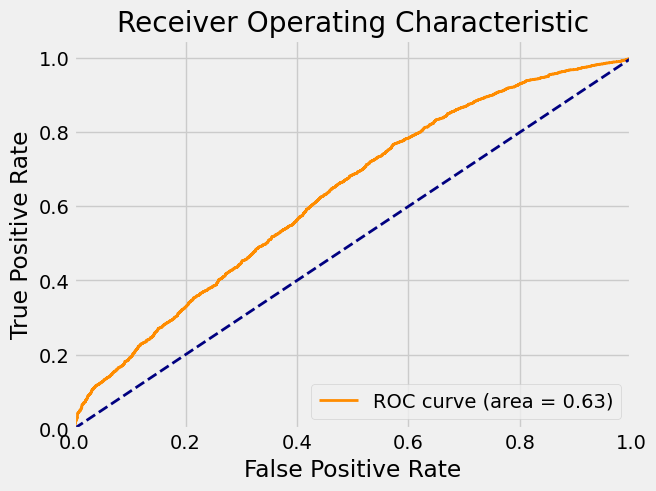

In [661]:
# MODEL 1: Logistic Regression - used by Quant Researchers in banks to predict Probability of Default,
#                               in this case, we'll use it to predict Probability of Mortality

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc, log_loss
import matplotlib.pyplot as plt



# Split data into train and test sets
X_train = X_train_df[X_train_df.columns.values[:-1]] # no death column
X_val = X_train_df[X_train_df.columns.values[:-1]] # use everything in the training data to validate
y_train = X_train_df['death']
y_val = X_train_df['death']


# Initialize the logistic regression model, using default hyperparameters
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict_proba(X_val)[:, 1]


# Generate ROC curve data for train set
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [562]:
check_df = pd.concat([y_val,
            pd.DataFrame(data=y_pred,columns=['y_pred'],index=y_val.index)
            ],axis=1)
            
check_df

,death,y_pred
0,1,1
1,1,1
2,1,0
3,0,1
4,1,1
...,...,...
7279,1,1
7280,1,1
7281,1,1
7282,1,1


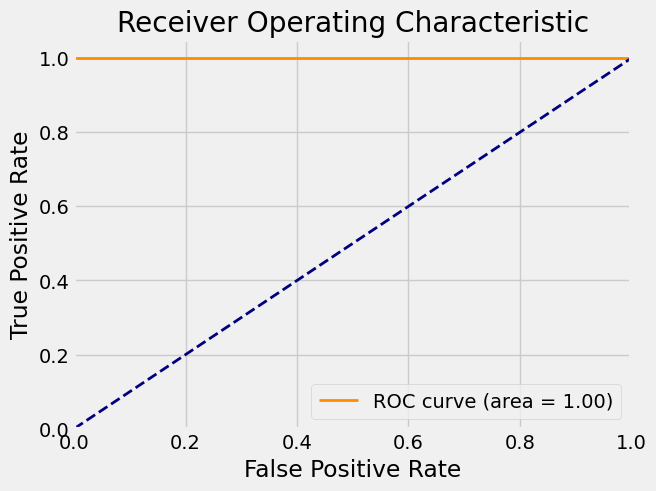

In [657]:
# MODEL 2: Random Forest Regression - CANNOT BE USED FOR PREDICTING PROBABILITY

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, roc_auc_score, auc, log_loss
import matplotlib.pyplot as plt



# Split data into train and test sets
X_train = X_train_df[X_train_df.columns.values[:-1]] # no death column
X_val = X_train_df[X_train_df.columns.values[:-1]] # use everything in the training data to validate
y_train = X_train_df['death']
y_val = X_train_df['death']


# Initialize the regression model, using default hyperparameters
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_val)



# Generate ROC curve data for train set
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# most likely overfitting

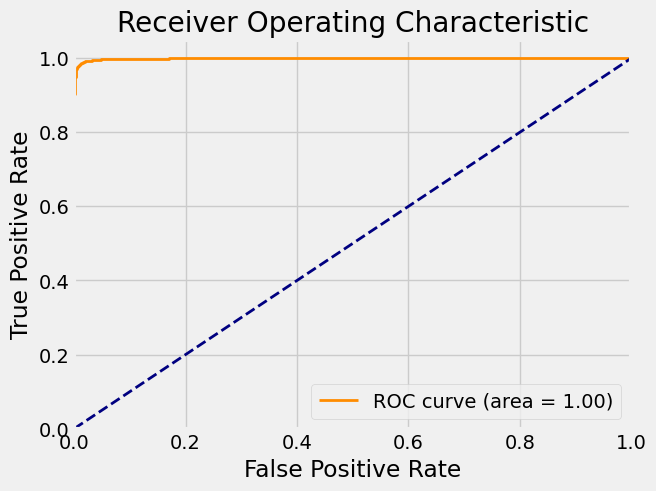

In [673]:
# MODEL 3: XGBoost classifier

import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, auc, log_loss
import matplotlib.pyplot as plt


# Split data into train and test sets
X_train = X_train_df[X_train_df.columns.values[:-1]] # no death column
X_val = X_train_df[X_train_df.columns.values[:-1]] # use everything in the training data to validate
y_train = X_train_df['death']
y_val = X_train_df['death']


# Initialize the model
model = xgb.XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict_proba(X_val)[:, 1]



# Generate ROC curve data for train set
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

PROCESS TEST DF BEFORE PREDICTION

In [674]:
test_df.tail()

,ID,age,sex,slos,dzgroup,dzclass,edu,income,charges,totcst,...,alb,bili,crea,sod,ph,glucose,bun,urine,sfdm2,adlsc
1816,1816,73.90295,male,4,CHF,COPD/CHF/Cirrhosis,16.0,NaN,6676.000,4164.0781,...,NaN,NaN,1.500000,137.0,NaN,NaN,NaN,NaN,NaN,2.252441
1817,1817,67.34595,female,38,Coma,Coma,11.0,under $11k,67080.000,44024.9062,...,3.199707,0.699951,1.299805,143.0,7.459961,74.0,26.0,1100.0,<2 mo. follow-up,1.000000
1818,1818,57.06998,female,26,Lung Cancer,Cancer,12.0,$25-$50k,40442.000,NaN,...,NaN,0.500000,6.199219,139.0,7.369141,158.0,101.0,960.0,<2 mo. follow-up,0.000000
1819,1819,63.89899,female,17,ARF/MOSF w/Sepsis,ARF/MOSF,4.0,under $11k,68388.125,44266.1875,...,NaN,NaN,2.299805,129.0,7.469727,NaN,NaN,NaN,<2 mo. follow-up,0.000000
1820,1820,75.09698,male,7,ARF/MOSF w/Sepsis,ARF/MOSF,8.0,$11-$25k,41196.000,27988.9375,...,NaN,NaN,2.000000,145.0,7.549805,NaN,NaN,NaN,<2 mo. follow-up,2.090332


In [675]:
test_df.isna().sum()

ID            0
age           0
sex           0
slos          0
dzgroup       0
dzclass       0
edu         319
income      563
charges      44
totcst      179
totmcst     697
race          9
hday          0
diabetes      0
dementia      0
ca            0
meanbp        1
wblc         38
hrt           1
resp          1
temp          1
pafi        470
alb         689
bili        523
crea         17
sod           1
ph          468
glucose     907
bun         884
urine       985
sfdm2       291
adlsc         0
dtype: int64

In [676]:
# will need to process the test_df using the same methods done in the previous sections

test_df_encoded = test_df.copy()

# encode all categorical data in the original dataset
for feature in [x for x in test_df.select_dtypes(include=['object', 'category']).columns.values]: 
   test_df_encoded[feature] = test_df_encoded[feature].map( one_hot_encoding(test_df_encoded[feature]) )


# use sklearn iterative imputer model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the IterativeImputer
imputer = IterativeImputer()

# Fit and transform the data
imputed_data = imputer.fit_transform(test_df_encoded)

# Convert back to a DataFrame
imputed_df = pd.DataFrame(data=imputed_data, columns=test_df_encoded.columns)

imputed_df

c:\Users\jpkdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,ID,age,sex,slos,dzgroup,dzclass,edu,income,charges,totcst,...,alb,bili,crea,sod,ph,glucose,bun,urine,sfdm2,adlsc
0,0.0,75.70197,0.0,12.0,2.0,1.0,15.000000,1.000000,8417.000,5477.293000,...,3.310554,0.399963,1.299805,136.0,7.349609,175.000000,42.000000,1100.000000,2.000000,2.000000
1,1.0,44.61600,0.0,16.0,1.0,1.0,16.000000,0.000000,71501.000,34153.906200,...,3.000000,3.199707,1.099854,126.0,7.419020,106.000000,19.000000,2625.000000,0.896232,5.000000
2,2.0,66.43396,0.0,11.0,0.0,0.0,9.403357,0.000000,18040.000,11452.921900,...,4.699219,0.699951,1.399902,139.0,7.389648,156.784978,33.889313,2287.255017,3.000000,3.207520
3,3.0,50.97897,0.0,14.0,1.0,1.0,12.000000,1.000000,20779.000,12855.937500,...,3.145304,1.773158,0.599976,133.0,7.449219,160.000000,17.000000,2065.000000,0.000000,2.000000
4,4.0,49.54999,1.0,15.0,3.0,2.0,12.000000,0.000000,11291.000,8300.656200,...,3.190949,0.699951,0.899902,139.0,7.425082,88.000000,12.000000,2429.151596,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,1816.0,73.90295,0.0,4.0,1.0,1.0,16.000000,1.426251,6676.000,4164.078100,...,3.001349,1.424044,1.500000,137.0,7.422183,155.557611,23.960372,2176.282252,0.703450,2.252441
1817,1817.0,67.34595,1.0,38.0,5.0,3.0,11.000000,0.000000,67080.000,44024.906200,...,3.199707,0.699951,1.299805,143.0,7.459961,74.000000,26.000000,1100.000000,0.000000,1.000000
1818,1818.0,57.06998,1.0,26.0,3.0,2.0,12.000000,2.000000,40442.000,23485.814833,...,3.031940,0.500000,6.199219,139.0,7.369141,158.000000,101.000000,960.000000,0.000000,0.000000
1819,1819.0,63.89899,1.0,17.0,0.0,0.0,4.000000,0.000000,68388.125,44266.187500,...,2.727438,3.425120,2.299805,129.0,7.469727,156.709016,44.282349,2183.418814,0.000000,0.000000


In [677]:
test_df_encoded.isna().sum()

ID            0
age           0
sex           0
slos          0
dzgroup       0
dzclass       0
edu         319
income      563
charges      44
totcst      179
totmcst     697
race          9
hday          0
diabetes      0
dementia      0
ca            0
meanbp        1
wblc         38
hrt           1
resp          1
temp          1
pafi        470
alb         689
bili        523
crea         17
sod           1
ph          468
glucose     907
bun         884
urine       985
sfdm2       291
adlsc         0
dtype: int64

In [680]:
# Predict using Model 3: XGBoost classifier - without imputing the test_df


X_test = test_df_encoded # my test_df without imputing the test_df

# Keep the 'ID' column separately
ids = X_test['ID'].copy()

# Drop the 'ID' column for prediction
test_df2 = X_test.drop(['ID'], axis=1)

# Use model to predict
test_predictions = model.predict_proba( test_df2[X_val.columns] )[:, 1]

# Make into DataFrame using the original IDs
submission_df_wo_imputing = pd.DataFrame({
    'ID': ids,
    'Death': test_predictions
})

# Show
submission_df_wo_imputing


,ID,Death
0,0,0.804907
1,1,0.992733
2,2,0.629142
3,3,0.999779
4,4,0.719822
...,...,...
1816,1816,0.642032
1817,1817,0.999947
1818,1818,0.999948
1819,1819,0.999812


In [681]:
# Predict using Model 3: XGBoost - with imputing the test_df


X_test = imputed_df # my test_df with imputing the test_df

# Keep the 'ID' column separately
ids = X_test['ID'].copy()

# Drop the 'ID' column for prediction
test_df2 = X_test.drop(['ID'], axis=1)

# Use model to predict
test_predictions = model.predict_proba( test_df2[X_val.columns] )[:, 1]

# Make into DataFrame using the original IDs
submission_df_w_imputing = pd.DataFrame({
    'ID': ids,
    'Death': test_predictions
})

# Show
submission_df_w_imputing


,ID,Death
0,0.0,0.804907
1,1.0,0.996567
2,2.0,0.515486
3,3.0,0.999946
4,4.0,0.719822
...,...,...
1816,1816.0,0.998162
1817,1817.0,0.999947
1818,1818.0,0.999852
1819,1819.0,0.999963


Checking the difference between the predictions from imputed test data and w/o imputed test data

In [692]:
diff_ser = abs(  submission_df_w_imputing['Death'] - submission_df_wo_imputing['Death']  )
diff_ser

0       0.000000
1       0.003835
2       0.113657
3       0.000168
4       0.000000
          ...   
1816    0.356130
1817    0.000000
1818    0.000096
1819    0.000151
1820    0.001721
Name: Death, Length: 1821, dtype: float32

In [697]:
diff_ser[ diff_ser > 0.2 ]

8       0.269920
11      0.336860
14      0.299105
20      0.350765
28      0.849418
          ...   
1793    0.487186
1802    0.423754
1804    0.255102
1805    0.708553
1816    0.356130
Name: Death, Length: 310, dtype: float32

In [701]:
len(diff_ser[ diff_ser > 0.2 ]) / len(X_test) # ratio of number of predicted inputs with >0.20 difference and total number of test datapoints

0.1702361339923119

Conclusion: for the sake of retaining the originality of the test data, predicted data from no imputation test data is submitted

In [703]:
submission_df_wo_imputing 

,ID,Death
0,0,0.804907
1,1,0.992733
2,2,0.629142
3,3,0.999779
4,4,0.719822
...,...,...
1816,1816,0.642032
1817,1817,0.999947
1818,1818,0.999948
1819,1819,0.999812


In [704]:
submission_df_wo_imputing.to_csv('example_submission_John Paul Dulay.csv', index=False) # for submission